# ASSIGNMENT 6 - INTRO TO MACHINE LEARNING | Support Vector Machine | Gradient Descent

> **FULL MARKS = 110**



**Note:** To submit the assignment, please follow the same steps as in assignments 1-5.

In this assignment we will cover the metrial of Support Vector Machine(SVM) and Gradient Descent. You will need to first go over the example codes mentioned in class and basing on what you have learnt fill the code blanks and answer questions.

1. **Code Walk Through | SCORE : 5**
> 
  **1.1 SVM**
    
    In  this section you just need to walk through the code from Jupyter notebook that was presented in class. You don't have to do anything. But focus on the Application on Handwritten Letter Data classification. We will be doing a similar task, but a different dataset will be used.
    
    References
    > https://drive.google.com/file/d/1sJBs2FF2RP_r3_TbXJQuzZLuY7Tf6PgJ/view?usp=sharing

  **1.2 FASHION MNIST DATASET**

    The reference provides an introduction of the FASHION MNIST dataset. You are free to look up other online tutorials to get used to this dataset. 
      
    References
    
    > https://github.com/zalandoresearch/fashion-mnist

  **1.3 Gradient Descent**

    In  this section you just need to walk through the code from Jupyter notebook that was presented in class. You don't have to do anything. 

    References 

    > https://drive.google.com/file/d/1BmJmfs0Y6b6DfRatAkKeeIzpOBAeT9pr/view?usp=sharing


2. **Support Vector Classifier for Fashion MNIST Classification | SCORE : 60**
    
  **2.1 SVC using linear kernel**
      
  **2.2 SVC using polynomial (poly) kernel**

  **2.3 SVC using radial (RBF) kernel**

  **2.4 SVC using radial (RBF) with parameter tuning kernel**


3. **Gradient Descent for Linear Regression | SCORE : 45**
  
  **3.1 Gradient Descent**

  **3.2 Stochastic Gradient Descent**

  **3.3 Mini Batch Gradient Descent**

  **3.4 Answer questions**
      


### 1. Code Walk Through
---



---



***EXERCISE NO. 1***

  > **Task-1 :FASHION MNIST DATASET | Score :5** 

In [1]:
# You are encouraged to research about fashion mnist dataset using the link in reference
# FashionvMNIST has 60,000 samples for training and around 10,000 samples for testing
# For the sake of this experiment we will not use entire dataset
# We will be using 10% of the dataset, that is around 6000 for training and 1000 for testing
# Run following cell to download data

In [2]:
# Download data by running this script
!wget https://github.com/Xiaomin-Li/CS4347/raw/main/SmallFashionMNIST.zip

--2021-04-07 01:46:39--  https://github.com/Xiaomin-Li/CS4347/raw/main/SmallFashionMNIST.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Xiaomin-Li/CS4347/main/SmallFashionMNIST.zip [following]
--2021-04-07 01:46:39--  https://raw.githubusercontent.com/Xiaomin-Li/CS4347/main/SmallFashionMNIST.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5627440 (5.4M) [application/zip]
Saving to: ‘SmallFashionMNIST.zip.1’

SmallFashionMNIST.z 100%[===================>]   5.37M  --.-KB/s    in 0.09s   

2021-04-07 01:46:39 (60.9 MB/s) - ‘SmallFashionMNIST.zip.1’ saved [5627440/5627440]



In [3]:
# Unzip dataset
!unzip SmallFashionMNIST.zip

Archive:  SmallFashionMNIST.zip
replace y28train.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
# Lets see our data
%ls

sample_data/             x28test.npy   x8train.npy   y8test.npy
SmallFashionMNIST.zip    x28train.npy  y28test.npy   y8train.npy
SmallFashionMNIST.zip.1  x8test.npy    y28train.npy


In [5]:
# Lets load the data
import numpy as np
x8train = np.load('x8train.npy')
y8train = np.load('y8train.npy')
x8test = np.load('x8test.npy')
y8test = np.load('y8test.npy')
x28train = np.load('x28train.npy')
y28train = np.load('y28train.npy')
x28test = np.load('x28test.npy')
y28test = np.load('y28test.npy')

In [6]:
# lets see the shape of data
print(f'x8train shape = {x8train.shape}')
print(f'y8train shape = {y8train.shape}')
print(f'x8test shape = {x8test.shape}')
print(f'y8test shape = {y8test.shape}')
print(f'x28train shape = {x28train.shape}')
print(f'y28train shape = {y28train.shape}')
print(f'x28test shape = {x28test.shape}')
print(f'y28test shape = {y28test.shape}')

x8train shape = (5971, 8, 8)
y8train shape = (5971,)
x8test shape = (979, 8, 8)
y8test shape = (979,)
x28train shape = (5971, 28, 28)
y28train shape = (5971,)
x28test shape = (979, 28, 28)
y28test shape = (979,)


In [7]:
# We will use following helper function to visualize data
import matplotlib.pyplot as plt
# Plot image randomly in a grid
def gridify(x, n = 64, title = '',height = 10):
  """
  note n should be square integer
  note x should be [b,h,w,c]
  """
  mask = np.random.choice([False, True], len(x), p=[0.75, 0.25])
  h = int(n**0.5)
  grid = x[mask][:n]
  plt.figure(figsize = (height,height))
  plt.title(title)
  plt.imshow(np.transpose(grid.reshape(h,h,x.shape[1],x.shape[2],1),(0,2,1,3,4)).reshape(h*x.shape[1],h*x.shape[2]), cmap='gray',interpolation='nearest')

# Plot first n images classwise
def plotclasswise(X,Y, height = 10,n = 10):
  fig, ax = plt.subplots(10,1)
  fig.set_figheight(height)
  fig.set_figwidth(1*n)
  for i in range(10):  
    x = X[Y == i][:n]
    ax[i].imshow(np.transpose(x.reshape(1,height,x.shape[1],x.shape[2],1),(0,2,1,3,4)).reshape(1*x.shape[1],n*x.shape[2]), cmap='gray',interpolation='nearest')
    ax[i].set_ylabel(f'Class : {str(i).zfill(2)}')

In [8]:
# To understand the nature of our data, we will visualize them.
# x8train shape = (5971, 8, 8) represents following
# We have 5971 images with height=8 and width= 8 pixels, we have only one color channel (among RGB)
# So it is grayscale image

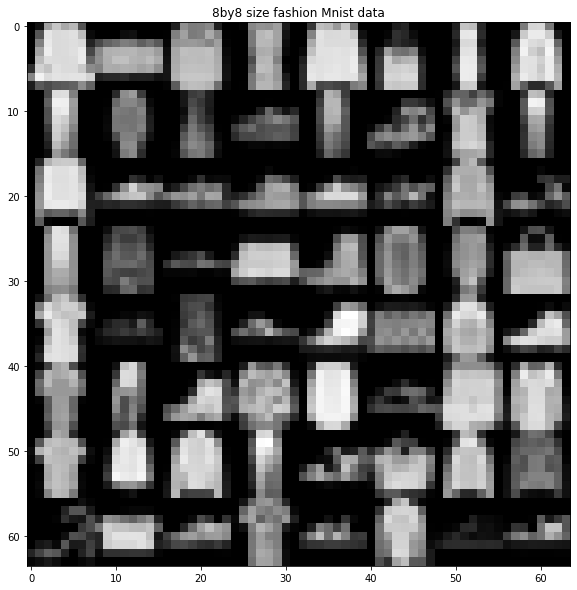

In [9]:
# Lets see few random images from the 8by8 sized data training data
gridify(x8train, title='8by8 size fashion Mnist data')

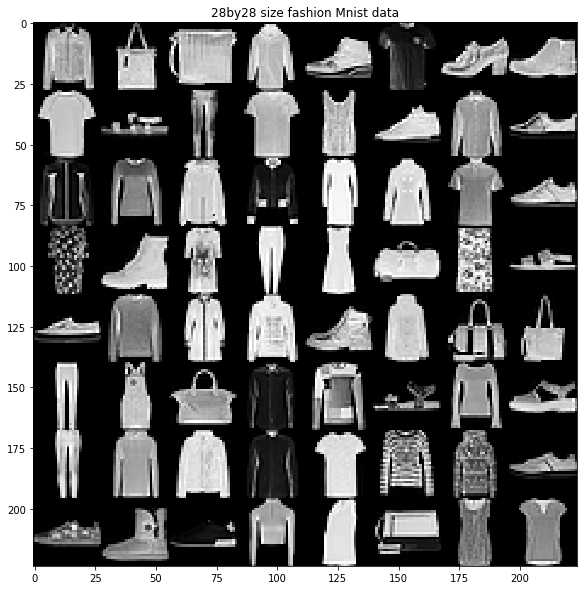

In [10]:
# Lets see few random images from the 28by28 sized data training data
gridify(x28train, title='28by28 size fashion Mnist data')

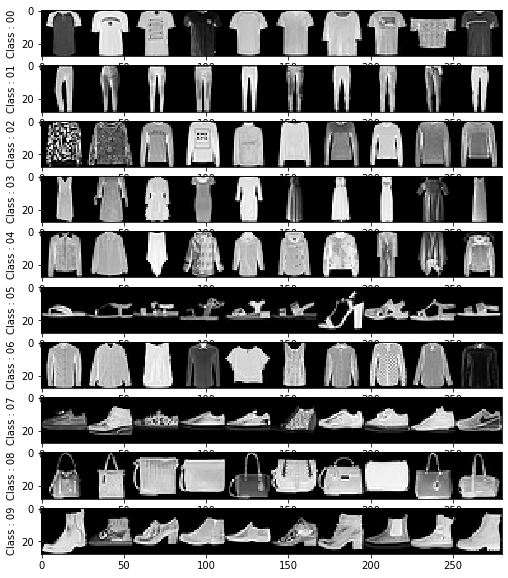

In [11]:
# Lets visualize 28by28 size data classwise
plotclasswise(x28train, y28train)

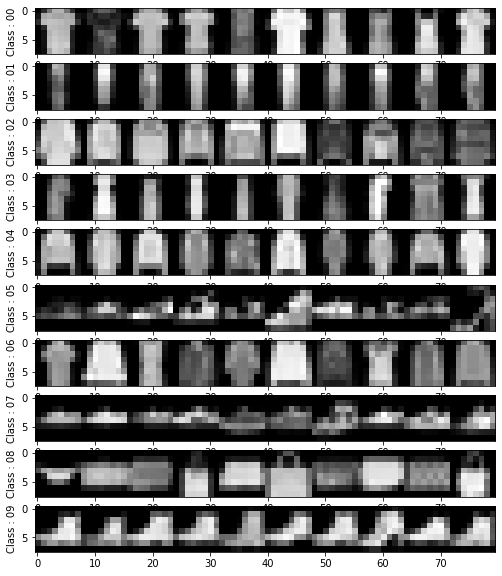

In [12]:
# Lets visualize 8by8 size data classwise
plotclasswise(x8train, y8train)

In [13]:
# You might have noticed that 8by8 images are way too blurry
# Due to decrease in resolution images lose a lot of information
# This will have an impact on our classifier in our experiments


In [14]:
# Note before fitting these data to SVC you need to reshape the images x into vectors
# (x here are x8train,x28train,x8test,x28test)
# You can use following function for that
def reshapeandreturn(x):
  b = x.shape[0]
  x_ = x.reshape(b,-1)
  return x_

# You don't need to reshape y
# You will be using the following x's for fitting and predicting
x8train_ = reshapeandreturn(x8train)
x28train_ = reshapeandreturn(x28train)
x8test_ = reshapeandreturn(x8test)
x28test_ = reshapeandreturn(x28test)
print(x8train_.shape, x8train.shape)
print(x28train_.shape, x28train.shape)

(5971, 64) (5971, 8, 8)
(5971, 784) (5971, 28, 28)


In [15]:
# As a part of code walkthrough you need to answer following one question.

# Why do you think we need to reshape the images?
"""
Answer goes here
Reshaping is needed to compensate for the information that is lost by the lower
quality of the images used for the test and training sets 



"""
print()

### 2. IMPLEMENT SVM CLASSIFICATION BY FOLLOWING THE EXAMPLES PROVIDED IN THE REFENCE GIVEN AS A WALK THROUGH
---



---



In [16]:
# import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import metrics
import pandas as pd

***EXERCISE NO. 2***

  > **Task-1 : 2.1 Implement Support Vector Classifier for Fashion MNIST Classification Dataset using linear kernel | Score :15** 

In [17]:
# You can have as many cells as needed 
# Requirements
"""
Requirement 1. Use the dataset with height(h) = 8, width(w) = 8. Print a classification report and plot a confusion matrix.
               This sklearn example shows how that is done for the digits dataset
               https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html
               You can use x8train,y8train,x8test,y8test,x8train_,x8test_ for this task

Requirement 2. Use the dataset with height(h) = 28, width(w) = 28. Print a classification report and plot a confusion matrix.
               You can use x28train,y28train,x28test,y28test,x28train_,x28test_ for this task

"""

# Create a SVC linear model named linear_svc8 
linear_svc8 =  SVC(C = 1, kernel = "linear")
# Create a SVC linear model named linear_svc28 
linear_svc28 = SVC(C = 1, kernel = "linear")

# Fit linear_svc8 model with x8train_ and y8train
linear_svc8.fit(x8train_, y8train)
predicted_linear8_y = linear_svc8.predict(x8test_)
# Fit linear_svc28 model with x28train_ and y28train
linear_svc28.fit(x28train_, y28train)
predicted_linear28_y = linear_svc28.predict(x28test_)


In [18]:
# print out linear_svc8 classification report on test set
print(f"Classification report for classifier {linear_svc8}:\n"
      f"{metrics.classification_report(y8test, predicted_linear8_y)}\n")

Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83       105
         1.0       0.94      0.92      0.93        98
         2.0       0.69      0.62      0.66        96
         3.0       0.73      0.79      0.76        92
         4.0       0.67      0.66      0.66        97
         5.0       0.95      0.89      0.92       101
         6.0       0.46      0.43      0.45        88
         7.0       0.89      0.90      0.90       100
         8.0       0.90      0.94      0.92       107
         9.0       0.87      0.92      0.89        95

    accuracy                           0.80       979
   macro avg       0.79      0.79      0.79       979
weighte

Text(0.5, 0.98, 'Confusion Matrix linear_svc8')

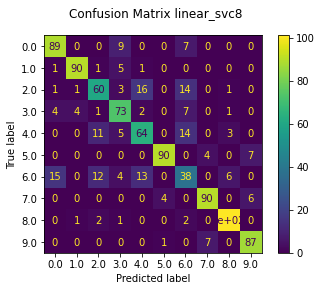

In [19]:
# plot linear_svc8 test results confusion_matrix 
disp = plot_confusion_matrix(linear_svc8, x8test_, y8test)
disp.figure_.suptitle("Confusion Matrix linear_svc8")

In [20]:
# print out linear_svc28 classification report on test set
print(f"Classification report for classifier {linear_svc28}:\n"
      f"{metrics.classification_report(y28test, predicted_linear28_y)}\n")

Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80       105
         1.0       0.97      0.96      0.96        98
         2.0       0.72      0.74      0.73        96
         3.0       0.81      0.76      0.79        92
         4.0       0.73      0.72      0.73        97
         5.0       0.94      0.90      0.92       101
         6.0       0.54      0.51      0.52        88
         7.0       0.88      0.89      0.89       100
         8.0       0.93      0.91      0.92       107
         9.0       0.92      0.95      0.93        95

    accuracy                           0.82       979
   macro avg       0.82      0.82      0.82       979
weighte

Text(0.5, 0.98, 'Confusion Matrix linear_svc28')

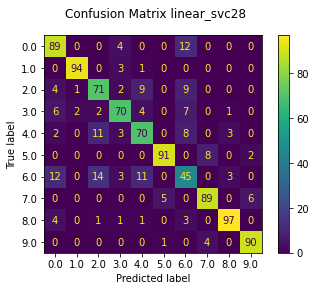

In [21]:
# plot linear_svc28 test results confusion_matrix 
disp = plot_confusion_matrix(linear_svc28, x28test_, y28test)
disp.figure_.suptitle("Confusion Matrix linear_svc28")

In [22]:
# What observations you can get from the linear_svc8 and linear_svc28 classification results? 
"""
Answer goes here
There were more misclassifications with the linear_svc8 set compared to
linear_svc28

"""
print()

***EXERCISE NO. 2***

  > **Task-2 : 2.2 Implement Support Vector Classifier for Fashion MNIST Classification Dataset using polynomial (poly) kernel | Score :15** 

In [23]:
# You can have as many cells as needed 
# Requirements
"""
Requirement 1. Use the dataset with height(h) = 8, width(w) = 8. Print a classification report and plot a confusion matrix.
               You can use x8train,y8train,x8test,y8test,x8train_,x8test_ for this task

Requirement 2. Use the dataset with height(h) = 28, width(w) = 28. Print a classification report and plot a confusion matrix.
               You can use x28train,y28train,x28test,y28test,x28train_,x28test_ for this task

"""

# Create a SVC poly model named poly_svc8 
poly_svc8 = SVC(C = 1, kernel = "poly")
# Create a SVC poly model named poly_svc8 
poly_svc28 = SVC(C = 1, kernel = "poly")

# Fit poly_svc8 model with x8train_ and y8train
poly_svc8.fit(x8train_, y8train)
predicted_poly8_y = poly_svc8.predict(x8test_)
# Fit poly_svc28 model with x28train_ and y28train
poly_svc28.fit(x28train_, y28train)
predicted_poly28_y = poly_svc28.predict(x28test_)

In [24]:
# print out poly_svc8 classification report 
print(f"Classification report for classifier {poly_svc8}:\n"
      f"{metrics.classification_report(y8test, predicted_poly8_y)}\n")

Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78       105
         1.0       0.98      0.89      0.93        98
         2.0       0.76      0.59      0.67        96
         3.0       0.77      0.65      0.71        92
         4.0       0.71      0.63      0.67        97
         5.0       0.72      0.95      0.82       101
         6.0       0.40      0.53      0.46        88
         7.0       0.92      0.82      0.87       100
         8.0       0.94      0.94      0.94       107
         9.0       0.91      0.91      0.91        95

    accuracy                           0.78       979
   macro avg       0.79      0.77      0.77       979
weighted 

Text(0.5, 0.98, 'Confusion Matrix poly_svc8')

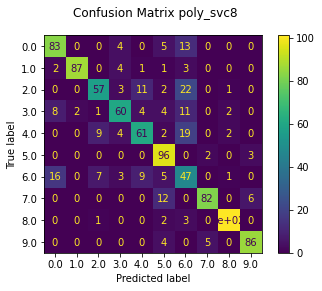

In [25]:
# plot poly_svc8 test results confusion_matrix 
disp = plot_confusion_matrix(poly_svc8, x8test_, y8test)
disp.figure_.suptitle("Confusion Matrix poly_svc8")

In [26]:
# print out poly_svc28 classification report 
print(f"Classification report for classifier {poly_svc28}:\n"
      f"{metrics.classification_report(y28test, predicted_poly28_y)}\n")

Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.78      0.77      0.78       105
         1.0       1.00      0.93      0.96        98
         2.0       0.81      0.72      0.76        96
         3.0       0.83      0.67      0.74        92
         4.0       0.74      0.70      0.72        97
         5.0       0.69      0.94      0.79       101
         6.0       0.49      0.56      0.52        88
         7.0       0.93      0.85      0.89       100
         8.0       0.92      0.93      0.92       107
         9.0       0.93      0.93      0.93        95

    accuracy                           0.80       979
   macro avg       0.81      0.80      0.80       979
weighted 

Text(0.5, 0.98, 'Confusion Matrix poly_svc28')

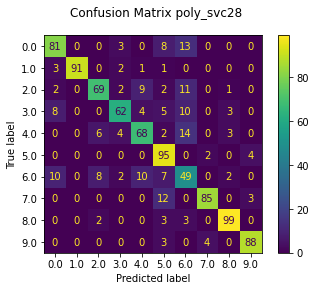

In [27]:
# plot poly_svc28 test results confusion_matrix 
disp = plot_confusion_matrix(poly_svc28, x28test_, y28test)
disp.figure_.suptitle("Confusion Matrix poly_svc28")

In [28]:
# What observations you can get from the SVC linear and SVC polynomial classsification results? 
"""
Answer goes here
Linear SVC performs better compared to the polynomial classifier
"""
print()

***EXERCISE NO. 2***

  > **Task-3 : 2.3 Implement Support Vector Classifier for Fashion MNIST Classification Dataset using radial kernel (RBF)| Score :15** 

In [29]:
# You can have as many cells as needed 
# Requirements
"""
Requirement 1. Use the dataset with height(h) = 8, width(w) = 8. Print a classification report and plot a confusion matrix.
               You can use x8train,y8train,x8test,y8test,x8train_,x8test_ for this task

Requirement 2. Use the dataset with height(h) = 28, width(w) = 28. Print a classification report and plot a confusion matrix.
               You can use x28train,y28train,x28test,y28test,x28train_,x28test_ for this task

"""

# Create a SVC rbf model named rbf_svc8 
rbf_svc8 = SVC(C = 1, kernel = "rbf")
# Create a SVC rbf model named rbf_svc28 
rbf_svc28 = SVC(C = 1, kernel = "rbf")

# Fit rbf_svc8 model with x8train_ and y8train
rbf_svc8.fit(x8train_, y8train)
predicted_rbf8_y = rbf_svc8.predict(x8test_)
# Fit rbf_svc28 model with x8train_ and y8train
rbf_svc28.fit(x28train_, y28train)
predicted_rbf28_y = rbf_svc28.predict(x28test_)

In [30]:
# print out rbf_svc8 classification report 
print(f"Classification report for classifier {rbf_svc8}:\n"
      f"{metrics.classification_report(y8test, predicted_rbf8_y)}\n")

Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84       105
         1.0       0.94      0.92      0.93        98
         2.0       0.69      0.66      0.67        96
         3.0       0.71      0.79      0.75        92
         4.0       0.70      0.66      0.68        97
         5.0       0.96      0.90      0.93       101
         6.0       0.50      0.49      0.49        88
         7.0       0.92      0.90      0.91       100
         8.0       0.92      0.96      0.94       107
         9.0       0.86      0.94      0.90        95

    accuracy                           0.81       979
   macro avg       0.80      0.81      0.80       979
weighted a

Text(0.5, 0.98, 'Confusion Matrix rbf_svc8')

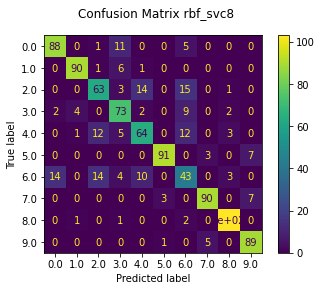

In [31]:
# plot rbf_svc8 test results confusion_matrix 
disp = plot_confusion_matrix(rbf_svc8, x8test_, y8test)
disp.figure_.suptitle("Confusion Matrix rbf_svc8")

In [32]:
# print out rbf_svc28 classification report 
print(f"Classification report for classifier {rbf_svc28}:\n"
      f"{metrics.classification_report(y28test, predicted_rbf28_y)}\n")

Classification report for classifier SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       105
         1.0       0.99      0.94      0.96        98
         2.0       0.74      0.73      0.74        96
         3.0       0.77      0.82      0.79        92
         4.0       0.71      0.74      0.73        97
         5.0       0.95      0.93      0.94       101
         6.0       0.56      0.51      0.54        88
         7.0       0.92      0.89      0.90       100
         8.0       0.90      0.95      0.93       107
         9.0       0.89      0.94      0.91        95

    accuracy                           0.83       979
   macro avg       0.83      0.83      0.83       979
weighted a

Text(0.5, 0.98, 'Confusion Matrix rbf_svc28')

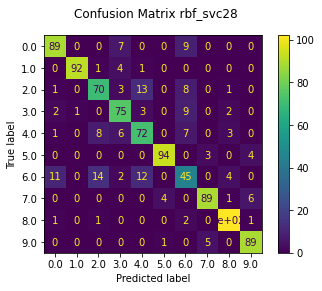

In [33]:
# plot rbf_svc28 test results confusion_matrix 
disp = plot_confusion_matrix(rbf_svc28, x28test_, y28test)
disp.figure_.suptitle("Confusion Matrix rbf_svc28")

In [34]:
# What observations you can get from the SVC linear, SVC polynomial, and SVC radial classsification results? 
"""
Answer goes here
Of the 3 classifications the SVC radial performed the best and had 
the least amount of misclassifcations
"""
print()

***EXERCISE NO. 2***

  > **Task-4 : 2.4 Implement Support Vector Classifier for Fashion MNIST Classification Dataset using radial kernel (RBF) with GridSearch to find the best possible parameters values for "C" and "gamma" | Score :15** 

In [35]:
# You can have as many cells as needed 
# Requirements
"""
Requirement 1. Use the dataset with height(h) = 8, width(w) = 8. Print a classification report and plot a confusion matrix.
               You can use x8train,y8train,x8test,y8test,x8train_,x8test_ for this task

Requirement 2. Use the dataset with height(h) = 28, width(w) = 28. Print a classification report and plot a confusion matrix.
               You can use x28train,y28train,x28test,y28test,x28train_,x28test_ for this task

"""

# NOTE: you are welcome to define more tuned_parameters, larger cross validation splits and test the results on the 28x28 pixels Fashion MNIST data. It will just take very long time to do so.  
tuned_parameters = [{'C': [0.01, 0.1, 1],
                     'gamma': [0.5, 1, 2]}]

from sklearn.model_selection import GridSearchCV

# Use GridSearchCV to create a gridrbf_svc8 model
# Pass SVC radial classifier, tuned_parameters, cross validation split cv= 2, scoring = 'accuracy' 
gridrbf_svc8 =  GridSearchCV(SVC(kernel = "rbf"), tuned_parameters, cv=2, scoring = 'accuracy')

# Fit gridrbf_svc8 model with x8train_ and y8train
gridrbf_svc8.fit(x8train_, y8train)
predicted_gridrbf8_y = gridrbf_svc8.predict(x8test_)

In [36]:
# print out gridrbf_svc8 classification report 
print(f"Classification report for classifier {gridrbf_svc8}:\n"
      f"{metrics.classification_report(y8test, predicted_gridrbf8_y)}\n")

Classification report for classifier GridSearchCV(cv=2, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.01, 0.1, 1], 'gamma': [0.5, 1, 2]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0):
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86       105
         1.0       0.94      0.94      0.94        98
         2.0       0.73      0.73      0.73        96
         3.0       0.75      0.78      0.77        92
         4.0       0.73

Text(0.5, 0.98, 'Confusion Matrix gridrbf_svc8')

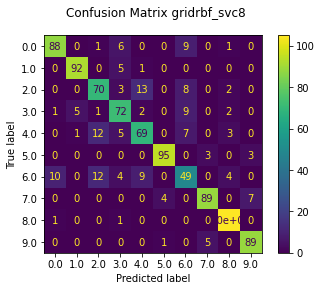

In [37]:
# plot gridrbf_svc8 test results confusion_matrix 
disp = plot_confusion_matrix(gridrbf_svc8, x8test_, y8test)
disp.figure_.suptitle("Confusion Matrix gridrbf_svc8")

In [38]:
# print gridrbf_svc8 best parameters 
gridrbf_svc8.best_params_

{'C': 1, 'gamma': 1}

### 3. Gradient Descent for linear regression
---



---



***EXERCISE NO. 3***

  > **Task-1 : 3.1 Implement Gradient Descent to find best parameters of a linear function | Score :10** 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import time

Let's create some data which x and y following an approximate linear function:
\begin{equation} y = 2x + 5 \end{equation}
And add some Gaussian noise to the data

In [40]:
X = 2 * np.random.rand(100,1)
y = 5 + 2 * X + np.random.randn(100,1)

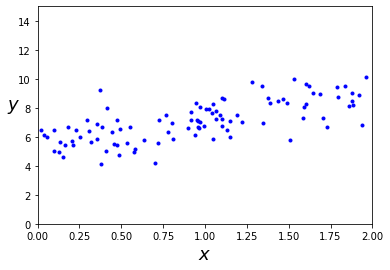

In [41]:
# visualization the created data
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
_ =plt.axis([0,2,0,15])

**Cost Function & Gradients**

The equation for calculating cost function and gradients are as shown below. Please note the cost function is for Linear regression. For other algorithms the cost function will be different and the gradients would have to be derived from the cost functions. 




<b>Cost</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Gradient</b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Gradients</b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

For our linear regression task, we will only need to predict two parameters: 
\begin{equation} \theta_0= 5 \end{equation} 
\begin{equation} \theta_1= 2 \end{equation} 

In [42]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost


In [43]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,2))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*(X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history
    

In [44]:
# run multiple times to find a proper learning rate and iteration times to find theta0 and theta1 as quick and accurate as possible 
lr = 0.01
n_iter = 1000

theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

# use gradient_descent method provided to calcualte the following terms
theta,cost_history,theta_history = gradient_descent(X_b, y, theta, lr, n_iter)


print('Theta0:{:0.3f},\nTheta1:{:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:5.063,
Theta1:2.110
Final cost/MSE:  5111.172


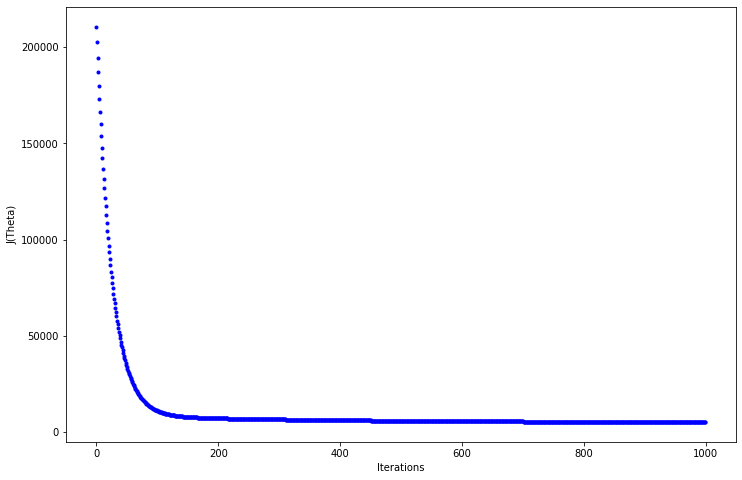

In [45]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

***EXERCISE NO. 3***

  > **Task-2 : 3.2 Implement Stochastic Gradient Descent | Score :10** 

In [46]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [47]:
# run multiple times to find a proper learning rate and iteration times to find theta0 and theta1 as quick and accurate as possible 
lr = 0.5
n_iter = 50
theta = np.random.randn(2,1)

X_b = np.c_[np.ones((len(X),1)),X]

# use stocashtic_gradient_descent method provided to calcualte the following terms
theta,cost_history = stocashtic_gradient_descent(X_b,y,theta,lr,n_iter)

print('Theta0: {:0.3f},\nTheta1: {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0: 5.405,
Theta1: 1.837
Final cost/MSE:  32.235


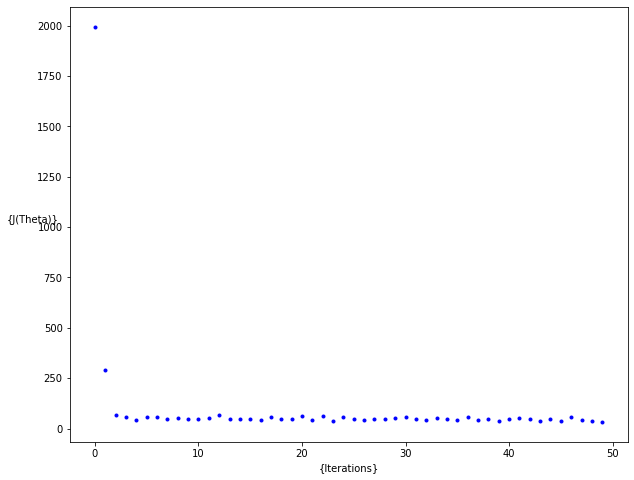

In [48]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

***EXERCISE NO. 3***

  > **Task-3 : 3.3 Implement Mini Batch Gradient Descent | Score :10** 

In [49]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        cost =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

In [50]:
# run multiple times to find a proper learning rate, iteration times, and batch size to find theta0 and theta1 as quick and accurate as possible 
lr = 0.1
n_iter = 200
batch_size = 32

theta = np.random.randn(2,1)

# use minibatch_gradient_descent method provided to calcualte the following terms
theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)

print('Theta0: {:0.3f},\nTheta1: {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0: 5.313,
Theta1: 1.882
Final cost/MSE:  987.210


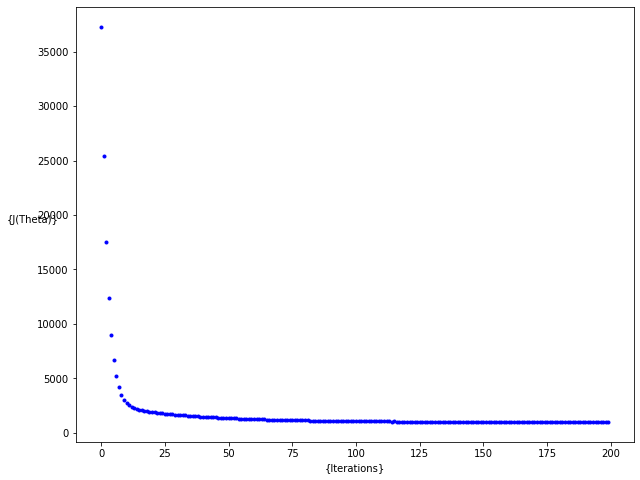

In [51]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('{J(Theta)}',rotation=0)
ax.set_xlabel('{Iterations}')
theta = np.random.randn(2,1)

_=ax.plot(range(n_iter),cost_history,'b.')

***EXERCISE NO. 3***

  > **Task-3 : 3.4 Answer questions | Score :15** 

In [52]:
# Answer the following questions: 
'''
1. Why we didn't get the exact theta0 = 5 and theta1 = 2? 
2. What are the advantages and disadvantages to use stochastic gradient descent other than the gradient descent used in Task 3.1? 
3. What are the advantages and disadvantages to use mini batch gradient descent comparing to stochastic gradient descent and the gradiant descent used in Task 3.1? 

'''

'''
Your answer goes here:
1. Because of the change in the learning rate effects theta0 and theta1
2. Advantages are increased model update frequency but can be computationally more expensive to train because of update frequency
3. Advantages: computationally more efficient compared to the other two Disadvantages: determinuing correct batcb size
'''

'\nYour answer goes here:\n\n'